In [41]:
import numpy as np
import pandas as pd
from keras.applications import mobilenet_v2
import tensorflow as tf

In [42]:
conv_base = mobilenet_v2.MobileNetV2(include_top=False, weights='imagenet',input_shape=(224, 224, 3))
conv_base.trainable = False


In [43]:
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [44]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [45]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation = 'softmax'))

W0918 20:32:16.381481 140150814349120 deprecation.py:506] From /home/divyanshu/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [46]:
#train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,
#height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory("train",target_size=(224 , 224),batch_size=10)

validation_generator = test_datagen.flow_from_directory("validation",target_size=(224, 224),batch_size=10)

model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])

history = model.fit_generator(train_generator,steps_per_epoch=25,epochs=10,validation_data=validation_generator,validation_steps=5)

Found 5614 images belonging to 2 classes.


W0918 20:32:17.481979 140150814349120 deprecation_wrapper.py:119] From /home/divyanshu/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Found 1835 images belonging to 2 classes.


W0918 20:32:17.767899 140150814349120 deprecation.py:323] From /home/divyanshu/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
25/25 [==============================] - 61s 2s/step - loss: 1.0774 - acc: 0.7080 - val_loss: 0.1629 - val_acc: 0.9600
Epoch 2/10
25/25 [==============================] - 45s 2s/step - loss: 0.5538 - acc: 0.7960 - val_loss: 0.2256 - val_acc: 0.9400
Epoch 3/10
25/25 [==============================] - 42s 2s/step - loss: 0.4586 - acc: 0.8200 - val_loss: 0.4593 - val_acc: 0.8600
Epoch 4/10
25/25 [==============================] - 42s 2s/step - loss: 0.4156 - acc: 0.8600 - val_loss: 0.1431 - val_acc: 0.9400
Epoch 5/10
25/25 [==============================] - 42s 2s/step - loss: 0.3237 - acc: 0.8840 - val_loss: 0.4185 - val_acc: 0.8800
Epoch 6/10
25/25 [==============================] - 42s 2s/step - loss: 0.2749 - acc: 0.8760 - val_loss: 0.3164 - val_acc: 0.9200
Epoch 7/10
25/25 [==============================] - 43s 2s/step - loss: 0.3856 - acc: 0.8600 - val_loss: 0.3852 - val_acc: 0.9200
Epoch 8/10
25/25 [==============================] - 43s 2s/step - loss: 0.4598 - acc: 0.84

In [47]:
a = conv_base.layers
set_trainable= False
for layer in a:
    print(layer.name)
    if (layer.name == 'batch_16_expand' or 'batch_15_expand' or 'batch_14_expand' or 'batch_12_expand' or 'batch_13_expand'):
        set_trainable=True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

input_2
Conv1_pad
Conv1
bn_Conv1
Conv1_relu
expanded_conv_depthwise
expanded_conv_depthwise_BN
expanded_conv_depthwise_relu
expanded_conv_project
expanded_conv_project_BN
block_1_expand
block_1_expand_BN
block_1_expand_relu
block_1_pad
block_1_depthwise
block_1_depthwise_BN
block_1_depthwise_relu
block_1_project
block_1_project_BN
block_2_expand
block_2_expand_BN
block_2_expand_relu
block_2_depthwise
block_2_depthwise_BN
block_2_depthwise_relu
block_2_project
block_2_project_BN
block_2_add
block_3_expand
block_3_expand_BN
block_3_expand_relu
block_3_pad
block_3_depthwise
block_3_depthwise_BN
block_3_depthwise_relu
block_3_project
block_3_project_BN
block_4_expand
block_4_expand_BN
block_4_expand_relu
block_4_depthwise
block_4_depthwise_BN
block_4_depthwise_relu
block_4_project
block_4_project_BN
block_4_add
block_5_expand
block_5_expand_BN
block_5_expand_relu
block_5_depthwise
block_5_depthwise_BN
block_5_depthwise_relu
block_5_project
block_5_project_BN
block_5_add
block_6_expand
bloc

In [48]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5),metrics=['acc'])

history = model.fit_generator(train_generator,steps_per_epoch=25,epochs=10,validation_data=validation_generator,validation_steps=5)

Epoch 1/10
25/25 [==============================] - 65s 3s/step - loss: 0.3856 - acc: 0.9000 - val_loss: 0.1265 - val_acc: 0.9400
Epoch 2/10
25/25 [==============================] - 42s 2s/step - loss: 0.2896 - acc: 0.9120 - val_loss: 0.3789 - val_acc: 0.9600
Epoch 3/10
25/25 [==============================] - 42s 2s/step - loss: 0.1357 - acc: 0.9640 - val_loss: 0.0113 - val_acc: 1.0000
Epoch 4/10
25/25 [==============================] - 42s 2s/step - loss: 0.3118 - acc: 0.8880 - val_loss: 0.2327 - val_acc: 0.9600
Epoch 5/10
25/25 [==============================] - 42s 2s/step - loss: 0.4314 - acc: 0.8720 - val_loss: 0.1999 - val_acc: 0.9800
Epoch 6/10
25/25 [==============================] - 43s 2s/step - loss: 0.2742 - acc: 0.9120 - val_loss: 0.1270 - val_acc: 0.9800
Epoch 7/10
25/25 [==============================] - 43s 2s/step - loss: 0.2568 - acc: 0.9200 - val_loss: 0.5606 - val_acc: 0.9200
Epoch 8/10
25/25 [==============================] - 42s 2s/step - loss: 0.4082 - acc: 0.88

In [51]:
predict_datagen = ImageDataGenerator(rescale=1/255)
predict_generator = predict_datagen.flow_from_directory('predict',target_size=(224,224),batch_size=10)
label_true = predict_generator.classes
stp = len(predict_generator)
label_predict = model.predict_generator(predict_generator , steps=stp)

Found 1378 images belonging to 2 classes.


In [55]:
predict = []
label_predict
for i in label_predict:
    if i[0]>i[1]:
        predict.append(0)
    else:
        predict.append(1)

In [61]:
predict = np.array(predict)
predict.shape


(1378,)

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(label_true,predict)
print('acc: %f' % accuracy)
precision = precision_score(label_true,predict)
print('precision: %f' % precision)
recall = recall_score(label_true,predict)
print('recall : %f' % recall)
f1 = f1_score(label_true,predict)
print('f1_score: %f' % f1)

acc: 0.665457
precision: 0.250965
recall : 0.195783
f1_score: 0.219966


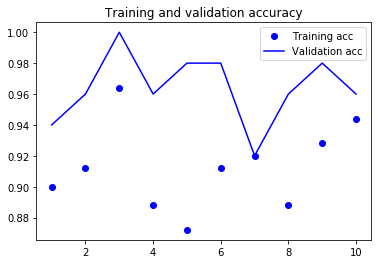

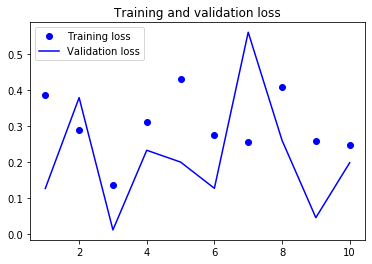

In [64]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()